## Step -1: Business Problem
Create a predictive model that can help a species of a penguin based on physical attributes, that we can used that model to help researches classify penguins in the field, instead of needing an experienced biologist.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Step -3: Data Preprocessing
EDA

In [4]:
continuous = ['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']
discrete = ['species', 'island', 'sex']

In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


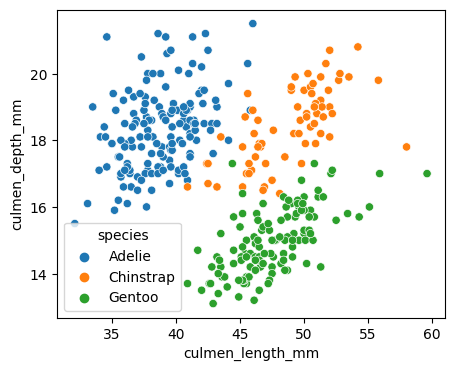

In [10]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species')
plt.show()

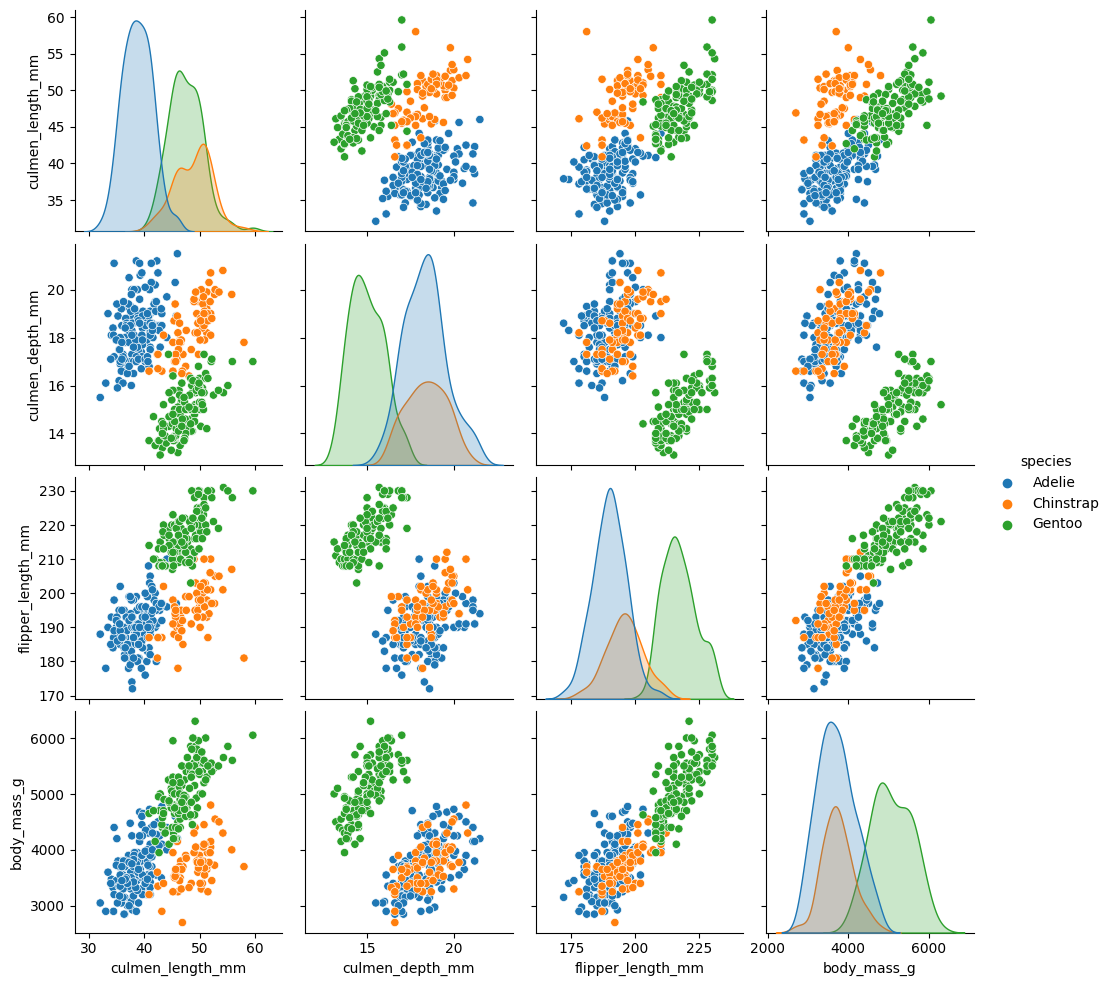

In [11]:
sns.pairplot(df, hue='species')
plt.show()

## based on my this scatter plot, I will apply decision tree

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [13]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

#### we will replace sex unqiue value with 'MALE' because there are more numbers of male

In [14]:
df['sex'].replace('.', 'MALE', inplace=True)
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

#### Encoding
as we can see, we applied encoing only on input variable not on output variable (on species) because obn output variable, we should not do encoding

In [17]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,True,False
3,43.92193,17.15117,200.915205,200.915205,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,False
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,200.915205,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,False,False,False
341,50.40000,15.70000,222.000000,5750.000000,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,False,False,False


In [18]:
y = df['species']

#### Train/ Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

## Step -4, 5: Modelling & Evaluation
#### Decision Tree Classifier - witn default Hyperparameters

default parameter is 'gini', max_depth = 'None', min_samples_split=3

### it means here tree has grown completely fully

In [20]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Prediction
ypred_train = dt_default.predict(X_train)

# Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(ypred_train, y_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(dt_default, X, y, cv=5).mean())

ypred_test = dt_default.predict(X_test)
print('Test accuracy:', accuracy_score(ypred_test, y_test))


Train accuracy: 1.0
Cross Validation: 0.9737851662404093
Test accuracy: 1.0


#### Visualize the tree

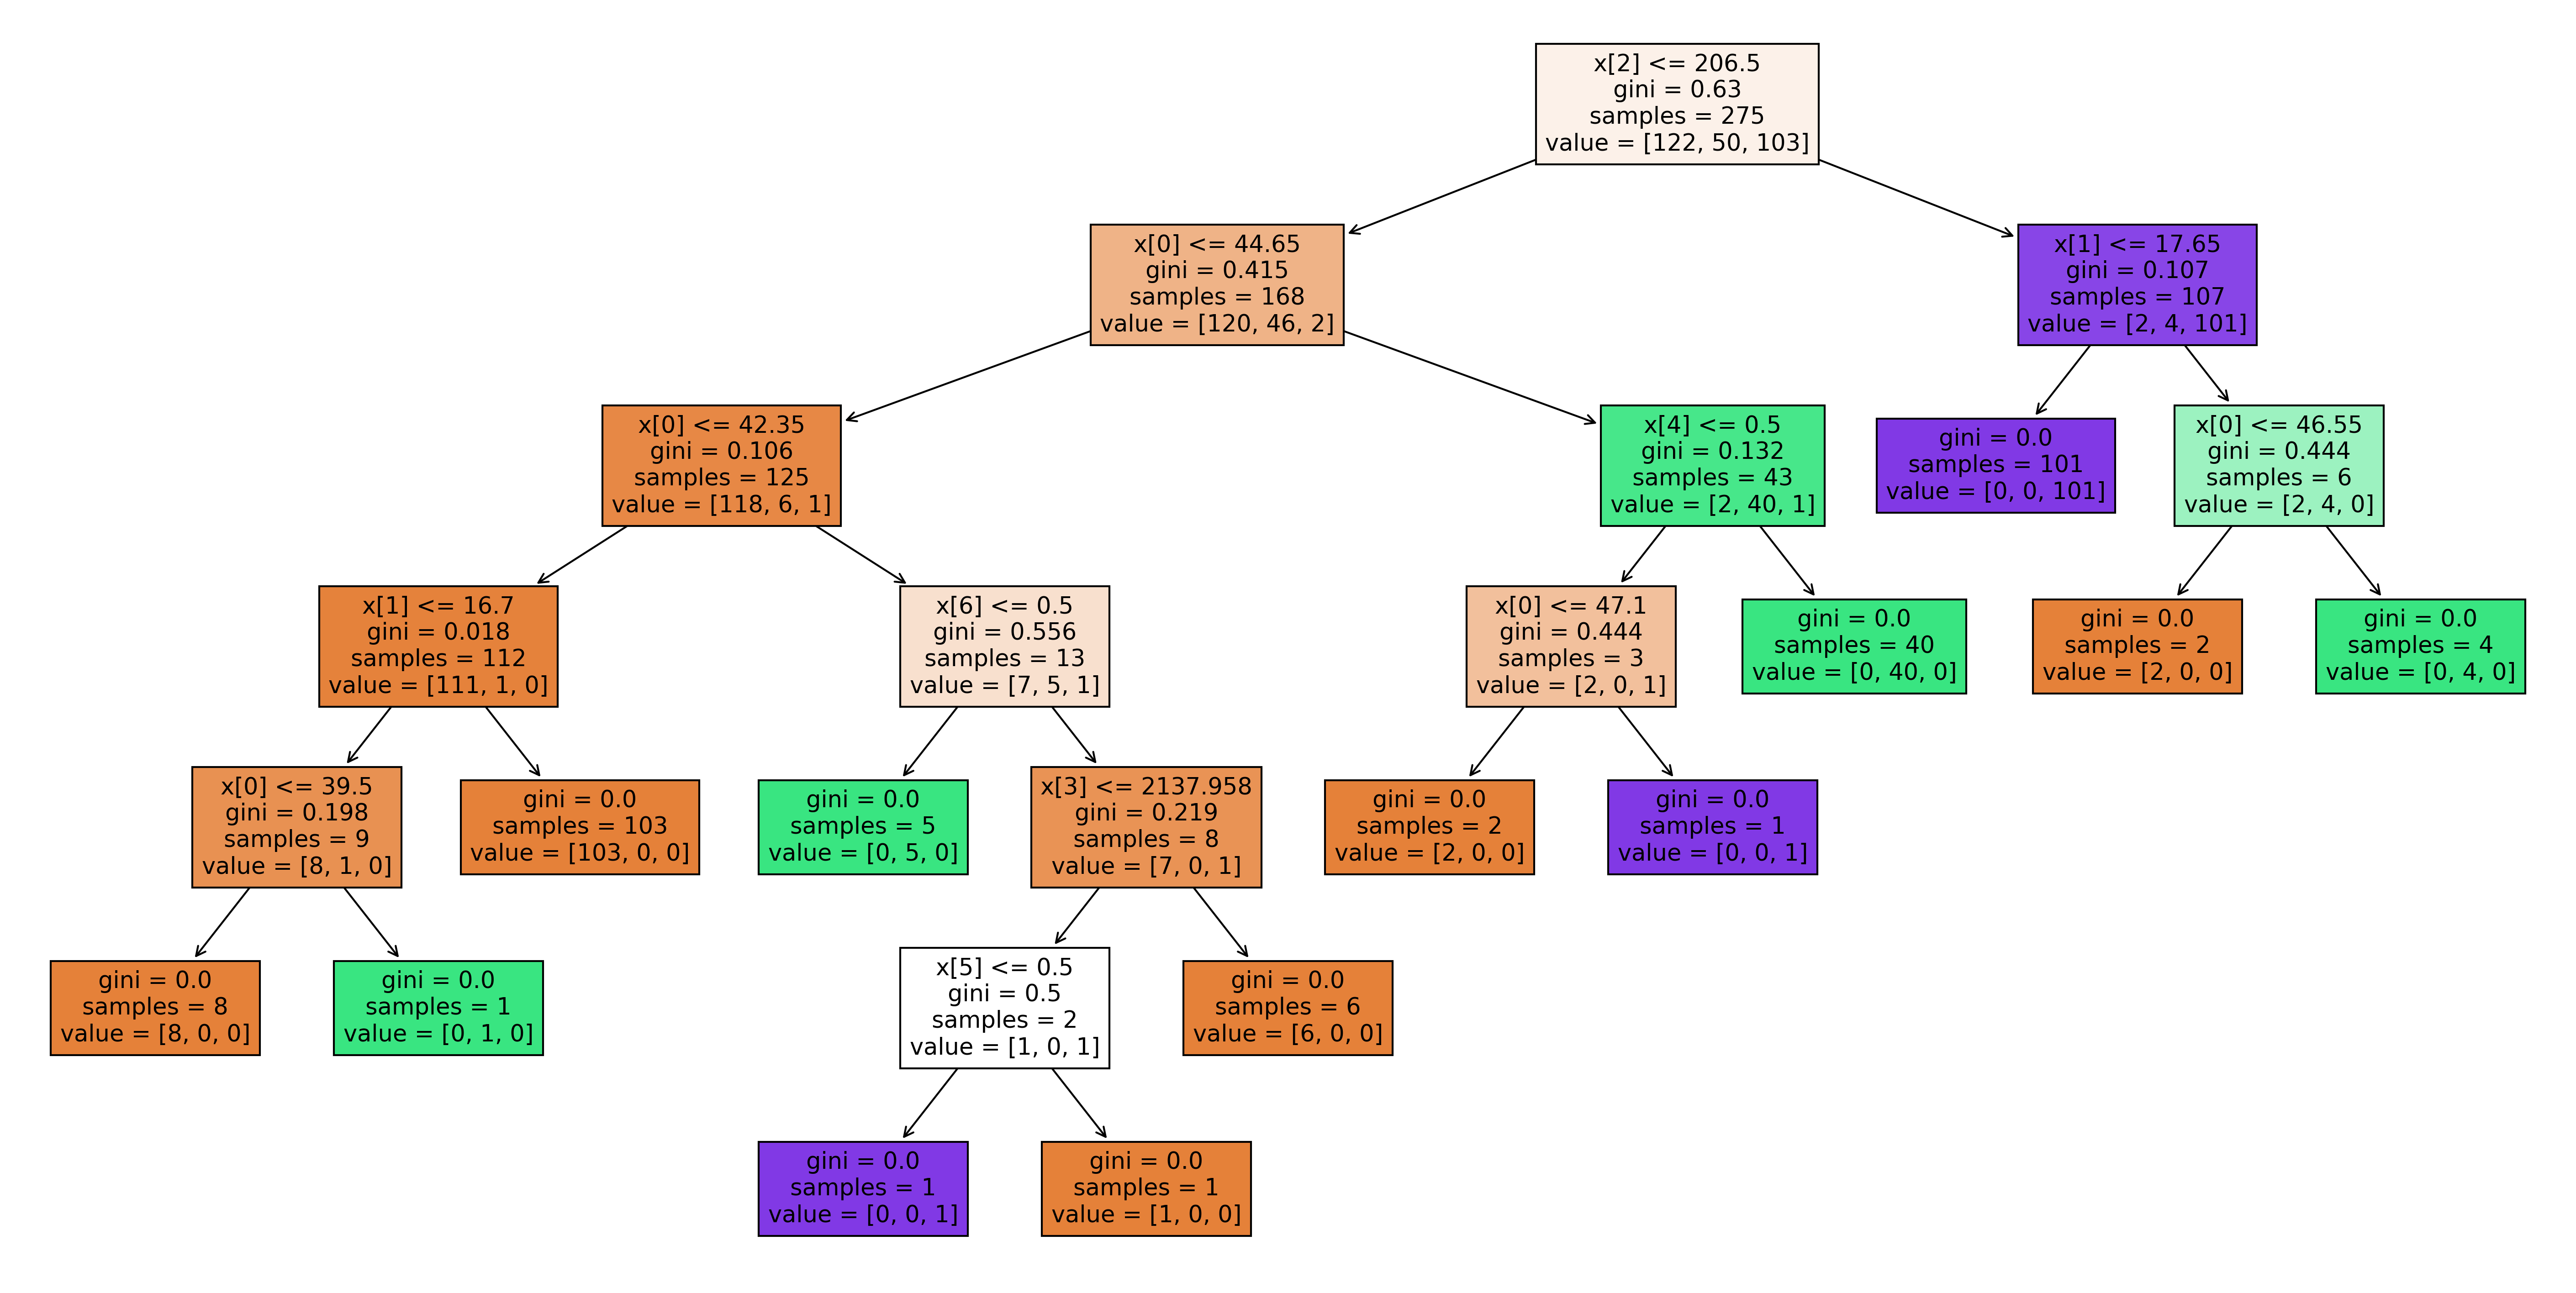

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=300)
# dpi = density per inch

plot_tree(dt_default,
         filled=True)
plt.show()

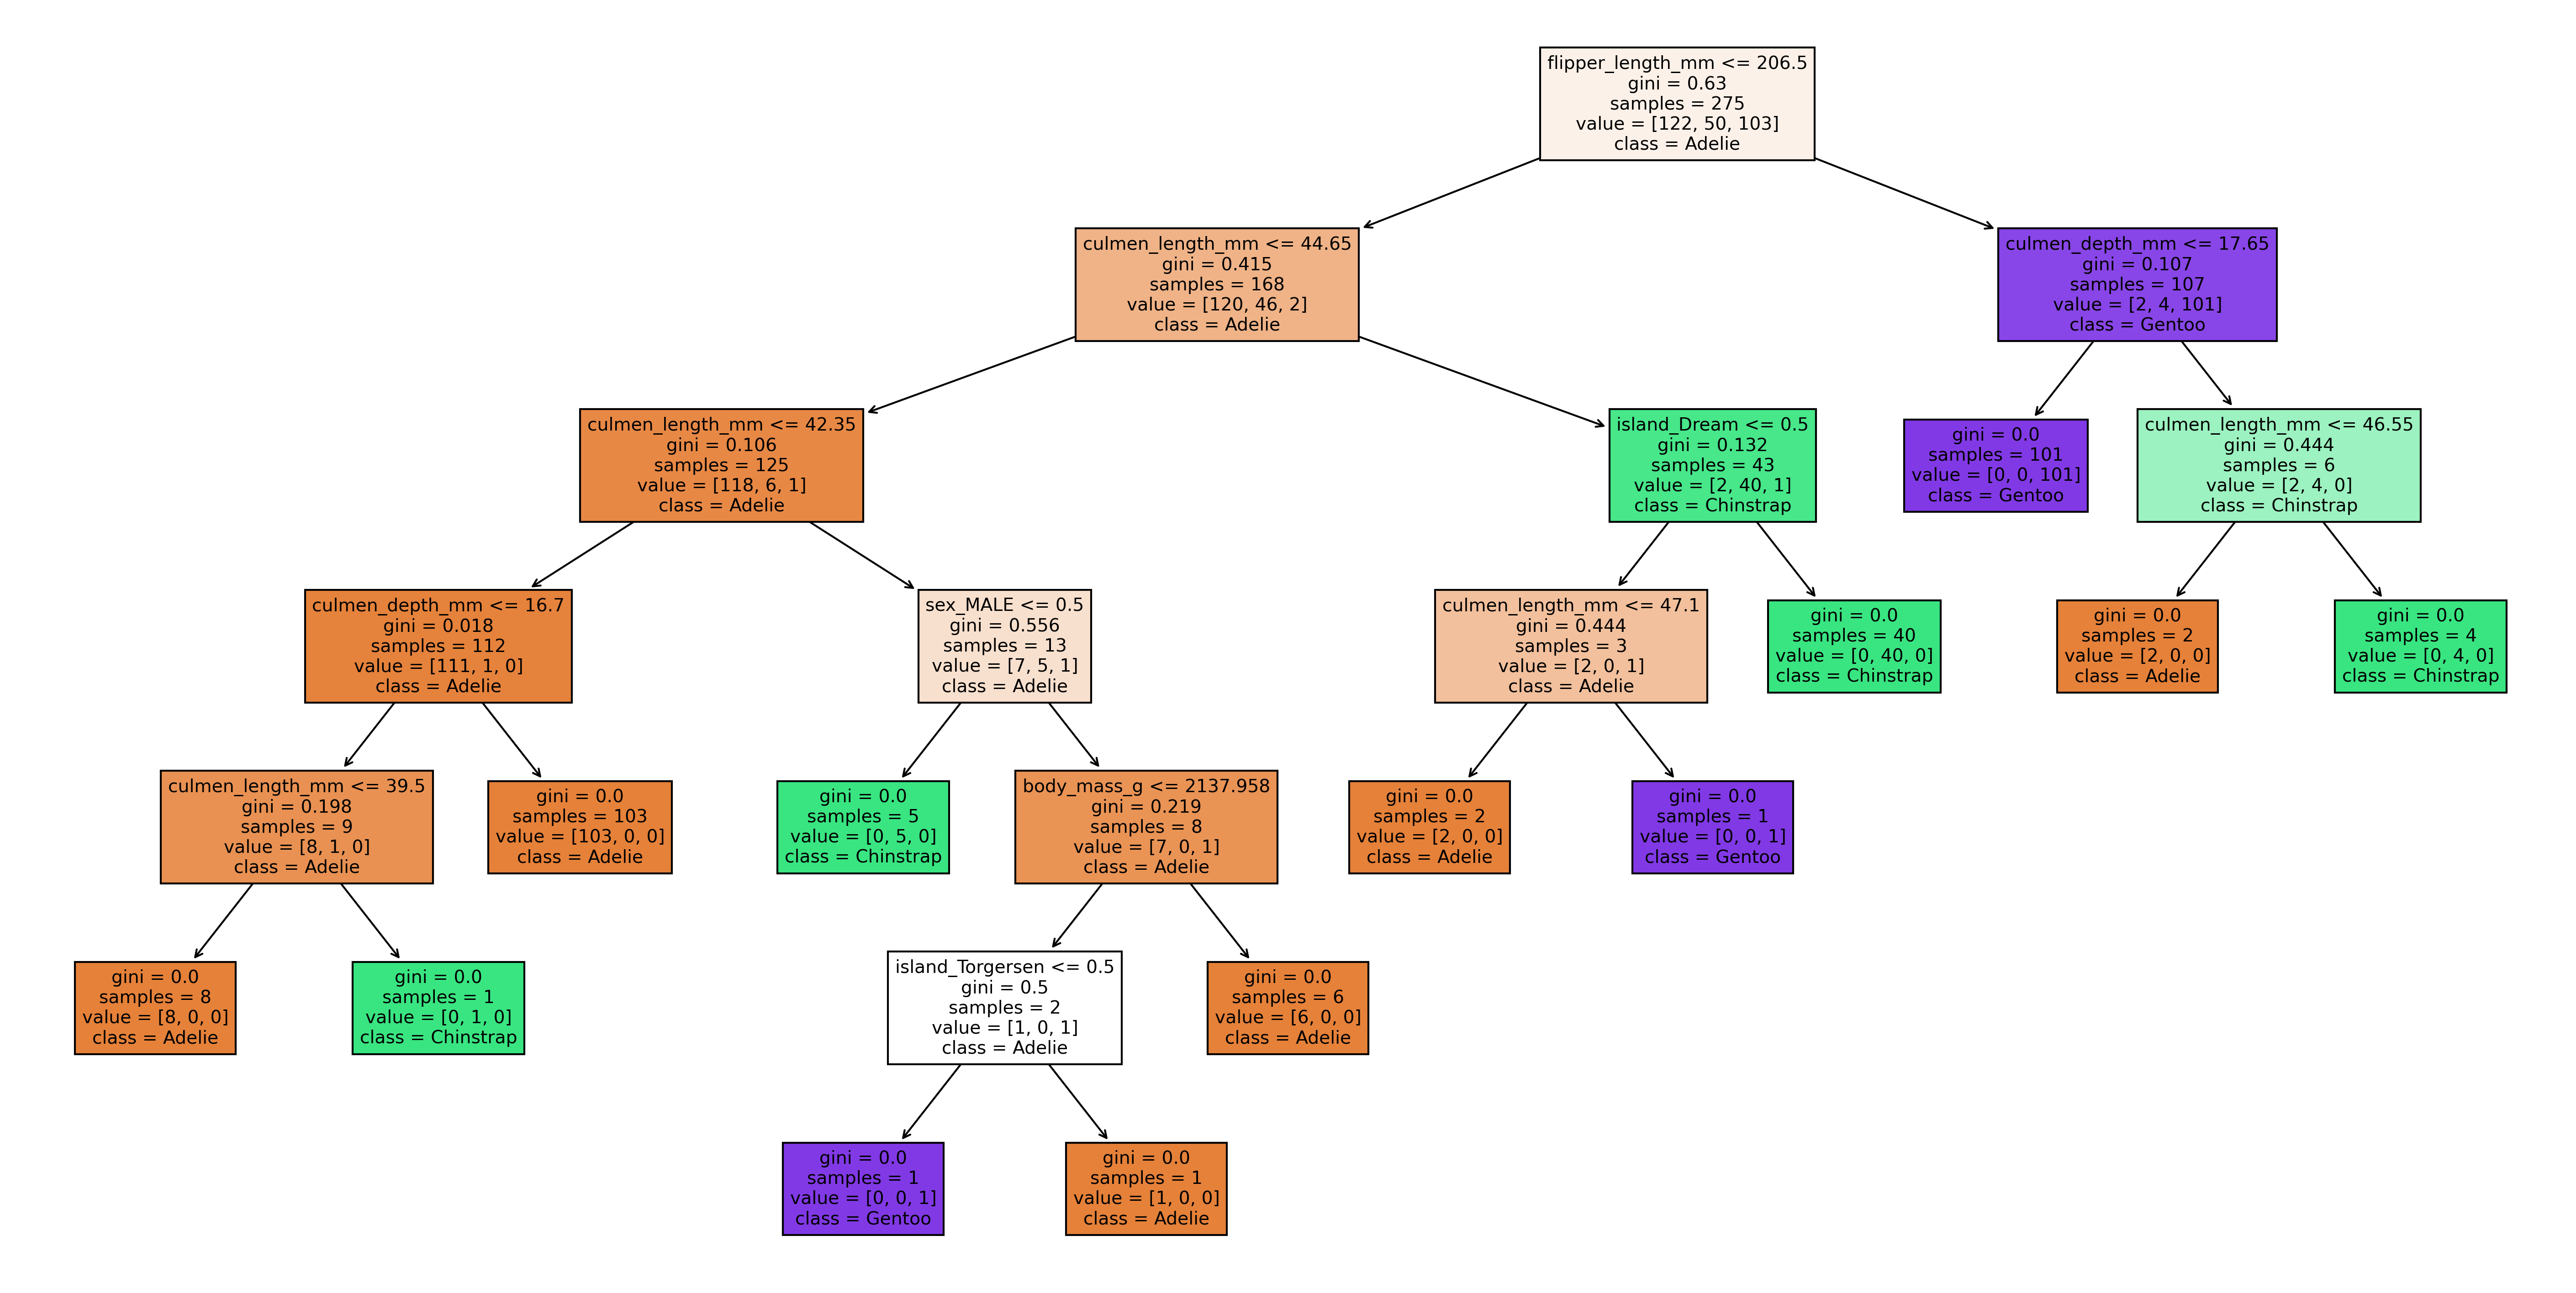

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=300)

plot_tree(dt_default,
         filled=True,
         feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

In [23]:
X_train.head(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
209,49.3,19.9,203.0,4050.0,True,False,True
103,37.8,20.0,190.0,4250.0,False,False,True


### when I will do fit on X_train, y_train it will calculate gini of each and every column. 

### and out of all gini value whichever the value will be highest that will be selected as a root node.

In [24]:
len(X_train.columns)

7

In [25]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,200.915205,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,200.915205,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


### Hyperparameter Tuning for Decision Tree Classifier

#### in decision tree you will get different accuracy so give random_state = 0 in DT model
## random state is used to lock the data

In [26]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state=0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':[1, 2, 3, 4, 5], 'min_samples_split':[45, 14]}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 14}

In [27]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=14, random_state=0)

#### Importance of each feature given by this model

In [28]:
data = grid.best_estimator_.feature_importances_
data

array([0.34238292, 0.05506425, 0.5754201 , 0.        , 0.02713274,
       0.        , 0.        ])

In [29]:
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats

,Feature Importance
culmen_length_mm,0.342383
culmen_depth_mm,0.055064
flipper_length_mm,0.575420
body_mass_g,0.000000
island_Dream,0.027133
island_Torgersen,0.000000
sex_MALE,0.000000


In [30]:
feats_imp = feats[feats['Feature Importance']>0]
feats_imp

,Feature Importance
culmen_length_mm,0.342383
culmen_depth_mm,0.055064
flipper_length_mm,0.575420
island_Dream,0.027133


In [31]:
feats_imp = feats[feats['Feature Importance']>0]
important_features_list = feats_imp.index.to_list()
important_features_list

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'island_Dream']

## Final DecisionTree Model
#### with best hyperparameter & with important features

In [32]:
# input with important features
X_imp = X[important_features_list]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print('Train accuracy:', accuracy_score(ypred_train, y_train))
print('Test accuracy:', accuracy_score(ypred_test, y_test))
print('Cross Validation Score:', cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train accuracy: 0.9963636363636363
Test accuracy: 1.0
Cross Validation Score: 0.9766837169650469


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)

In [34]:
dt_default.predict([[50, 20, 200, 4500, 1, 0, 0]])
# 1, 0 = island encoding
# 0 = gender encoding

array(['Chinstrap'], dtype=object)

In [35]:
final_dt_model.feature_importances_

array([0.32986127, 0.07590424, 0.56891573, 0.02531876])